In [1]:
from openbb_terminal.sdk import openbb

In [2]:
options_chain = openbb.stocks.options.chains(symbol="SPY", source = "YahooFinance") # The order for this code matters because in openbb, you first go to stocks, then options, then chains to find this information.
options_chain

Output()

,contractSymbol,optionType,expiration,strike,lastPrice,bid,ask,openInterest,volume,impliedVolatility
0,SPY230731C00370000,call,2023-07-31,370.0,86.28,87.61,88.28,17.0,27.0,1.792970
1,SPY230731C00380000,call,2023-07-31,380.0,76.59,77.61,78.28,7.0,17.0,1.593752
2,SPY230731C00383000,call,2023-07-31,383.0,74.07,74.61,75.28,3.0,16.0,1.535159
3,SPY230731C00384000,call,2023-07-31,384.0,72.78,73.61,74.41,3.0,3.0,1.591799
4,SPY230731C00385000,call,2023-07-31,385.0,71.73,72.61,73.14,2.0,4.0,1.382816
...,...,...,...,...,...,...,...,...,...,...
6530,SPY251219P00630000,put,2025-12-19,630.0,215.27,223.50,228.50,0.0,0.0,0.377799
6531,SPY251219P00650000,put,2025-12-19,650.0,195.00,189.50,194.50,1.0,3.0,0.138040
6532,SPY251219P00670000,put,2025-12-19,670.0,217.00,209.50,214.50,0.0,2.0,0.147134
6533,SPY251219P00680000,put,2025-12-19,680.0,224.03,219.50,224.50,0.0,0.0,0.151528


In [3]:
expiration_dates = openbb.stocks.options.expirations("SPY")
expiration_dates

['2023-08-01',
 '2023-08-02',
 '2023-08-03',
 '2023-08-04',
 '2023-08-07',
 '2023-08-08',
 '2023-08-09',
 '2023-08-10',
 '2023-08-11',
 '2023-08-14',
 '2023-08-18',
 '2023-08-25',
 '2023-09-01',
 '2023-09-08',
 '2023-09-15',
 '2023-09-29',
 '2023-10-20',
 '2023-11-17',
 '2023-12-15',
 '2023-12-29',
 '2024-01-19',
 '2024-03-15',
 '2024-03-28',
 '2024-06-21',
 '2024-06-28',
 '2024-09-20',
 '2024-12-20',
 '2025-01-17',
 '2025-03-21',
 '2025-06-20',
 '2025-12-19']

In [4]:
openbb.stocks.load("SPY")

Loading Daily data for SPY with starting period 2020-07-27.

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
date,,,,,,,,
2020-07-27,307.446612,309.148115,306.624521,308.966492,308.966492,48293000,0.0,0.0
2020-07-28,308.211313,309.367975,306.701001,307.006897,307.006897,57495000,0.0,0.0
2020-07-29,307.914950,311.365769,307.876705,310.782654,310.782654,48454200,0.0,0.0
2020-07-30,307.704704,310.104026,305.544386,309.673859,309.673859,61861700,0.0,0.0
2020-07-31,311.528287,312.226105,307.159810,312.120941,312.120941,84986800,0.0,0.0
...,...,...,...,...,...,...,...,...
2023-07-25,453.920013,456.739990,453.869995,455.440002,455.440002,55191200,0.0,0.0
2023-07-26,454.470001,456.989990,453.380005,455.510010,455.510010,71052900,0.0,0.0
2023-07-27,459.019989,459.440002,451.549988,452.489990,452.489990,92194400,0.0,0.0


In [5]:
last = openbb.stocks.load("SPY").iloc[-1]["Adj Close"] # Note: iloc[-1] is used to select the last row of the dataframe.

Loading Daily data for SPY with starting period 2020-07-27.

In [7]:
# We now want to find the option whose strike price is closest to the current spot price.
(options_chain.strike - last).abs()

0        87.790009
1        77.790009
2        74.790009
3        73.790009
4        72.790009
           ...    
6530    172.209991
6531    192.209991
6532    212.209991
6533    222.209991
6534    227.209991
Name: strike, Length: 6535, dtype: float64

In [8]:
(options_chain.strike - last).abs().sort_values() # At the top, we have the options whose strike is closest to current spot price. 

4763      0.209991
3184      0.209991
541       0.209991
2565      0.209991
421       0.209991
           ...    
5614    317.790009
5726    327.790009
5613    327.790009
5725    337.790009
5612    337.790009
Name: strike, Length: 6535, dtype: float64

In [9]:
idx = (options_chain.strike - last).abs().sort_values().index[0] # In this, we are trying to find the index of the option with the strike price that is closest to the last adjusted closing price (last).
idx

4763

In [10]:
atm_strike = options_chain.iloc[idx].strike # Getting the strike price of the atm option.
atm_strike

458.0

In [11]:
calls = options_chain[(options_chain.strike == atm_strike) & (options_chain.optionType == "call")] # This creates a new DataFrame calls that only contains the rows from options_chain where the strike price is equal to atm_strike and the option type is call options.
calls

,contractSymbol,optionType,expiration,strike,lastPrice,bid,ask,openInterest,volume,impliedVolatility
76,SPY230731C00458000,call,2023-07-31,458.0,0.03,0.03,0.04,12501.0,459881.0,0.012217
316,SPY230801C00458000,call,2023-08-01,458.0,0.95,0.95,0.96,0.0,148053.0,0.078500
541,SPY230802C00458000,call,2023-08-02,458.0,1.38,1.39,1.40,3766.0,26962.0,0.090707
748,SPY230803C00458000,call,2023-08-03,458.0,1.96,1.96,1.97,3421.0,9815.0,0.108407
968,SPY230804C00458000,call,2023-08-04,458.0,2.33,2.35,2.36,10212.0,28024.0,0.115243
1185,SPY230807C00458000,call,2023-08-07,458.0,2.68,2.69,2.70,1935.0,5959.0,0.103647
1289,SPY230808C00458000,call,2023-08-08,458.0,2.93,2.96,2.98,957.0,3571.0,0.107492
1393,SPY230809C00458000,call,2023-08-09,458.0,3.27,3.24,3.26,1936.0,1562.0,0.111215
1496,SPY230810C00458000,call,2023-08-10,458.0,3.68,3.70,3.72,0.0,2095.0,0.120553
1649,SPY230811C00458000,call,2023-08-11,458.0,3.93,3.94,3.96,7247.0,7873.0,0.122689


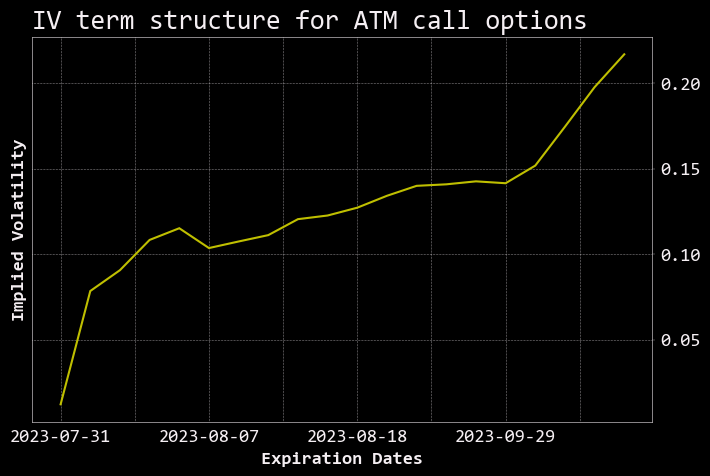

In [12]:
calls.set_index("expiration").impliedVolatility.plot(
    xlabel = "Expiration Dates",
    ylabel = "Implied Volatility",
    title = "IV term structure for ATM call options",
    color = "y",
    figsize = (8, 5)
);

In [16]:
calls = options_chain[(options_chain.expiration == expiration_dates[4]) & (options_chain.optionType == "call")]

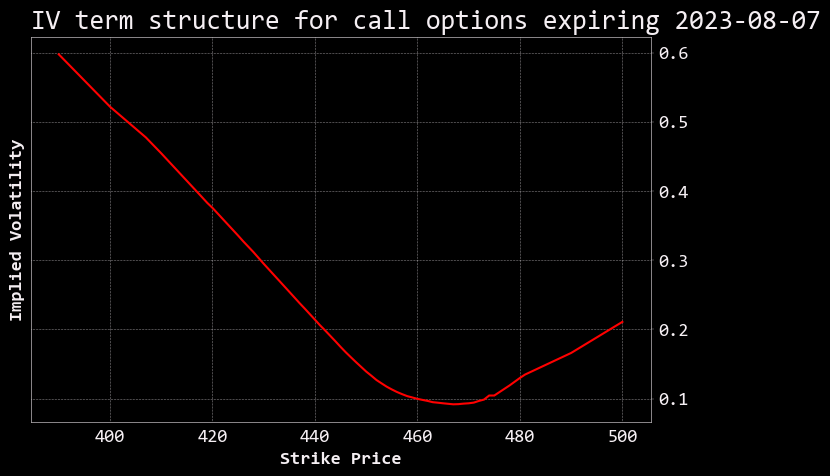

In [17]:
calls.set_index("strike").impliedVolatility.plot(
    xlabel = "Strike Price",
    ylabel = "Implied Volatility",
    title = f"IV term structure for call options expiring {expiration_dates[4]}",
    color = "r",
    figsize = (8, 5)
);